<a href="https://colab.research.google.com/github/vijayasri-manda/Data-Science/blob/main/Car%20Price%20Prediction/Car_Prediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score


In [ ]:
df=pd.read_csv('/content/Car details v3.csv')

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
df.shape

(8128, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [ ]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [ ]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


In [ ]:
len(df)

8128

In [ ]:
100*df.isnull().sum()/len(df)

,0
name,0.000000
year,0.000000
selling_price,0.000000
km_driven,0.000000
fuel,0.000000
seller_type,0.000000
transmission,0.000000
owner,0.000000
mileage,2.718996
engine,2.718996


In [ ]:
# remove kmpl extension in the mileage column
df['mileage'] = df['mileage'].str.split(' ').str[0]

In [ ]:
df['mileage kmpl'] = df['mileage']

In [ ]:
df.drop("mileage", axis = 1).head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,torque,seats,mileage kmpl
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.4
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.7
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.1


In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage kmpl
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.4
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.7
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.1


In [ ]:
df['engine'] = df['engine'].str.split(' ').str[0]

In [ ]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage kmpl
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74 bhp,190Nm@ 2000rpm,5.0,23.4
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.7


In [ ]:
df.rename(columns = {'engine':'engine CC'}, inplace = True)

In [ ]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine CC,max_power,torque,seats,mileage kmpl
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74 bhp,190Nm@ 2000rpm,5.0,23.4
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.7


In [ ]:
# remove bhp extension in max_power column and rename the column to max_power_bhp
df['max_power'] = df['max_power'].str.split(' ').str[0]
df.rename(columns = {'max_power':'max_power_bhp'}, inplace = True)

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine CC,max_power_bhp,torque,seats,mileage kmpl
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0,23.4
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0,21.14
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0,17.7
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0,23.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0,16.1


In [ ]:
df2 = df['torque']

In [ ]:
df2.head()

,torque
0,190Nm@ 2000rpm
1,250Nm@ 1500-2500rpm
2,"12.7@ 2,700(kgm@ rpm)"
3,22.4 kgm at 1750-2750rpm
4,"11.5@ 4,500(kgm@ rpm)"


In [ ]:
import pandas as pd

# Assuming df2 is a Series, convert it to a DataFrame first
df2 = df2.str.split('@|at', n=1, expand=True)
print(df2.head())

# Clean unwanted units from column 0
df2[0] = df2[0].str.replace(r'(kgm|KGM|Nm|nm)', '', regex=True)
print(df2.head())

# Extract the numeric part and convert to float
df2[0] = df2[0].str.extract(r'^(\d+\.?\d*)')[0].astype(float)
print(df2.head())


           0                 1
0      190Nm           2000rpm
1      250Nm      1500-2500rpm
2       12.7   2,700(kgm@ rpm)
3  22.4 kgm       1750-2750rpm
4       11.5   4,500(kgm@ rpm)
        0                 1
0     190           2000rpm
1     250      1500-2500rpm
2    12.7   2,700(kgm@ rpm)
3  22.4        1750-2750rpm
4    11.5   4,500(kgm@ rpm)
       0                 1
0  190.0           2000rpm
1  250.0      1500-2500rpm
2   12.7   2,700(kgm@ rpm)
3   22.4      1750-2750rpm
4   11.5   4,500(kgm@ rpm)


In [ ]:
df2[0] = df2[0].astype(float)
df2.loc[df2[1].str.contains('kgm', case=False, na=False), 0] *= 9.81
df2.loc[(df2[0] >= 10) & (df2[0] <= 99), 0] *= 9.81

In [ ]:
df2.head()

,0,1
0,190.000,2000rpm
1,250.000,1500-2500rpm
2,124.587,"2,700(kgm@ rpm)"
3,219.744,1750-2750rpm
4,112.815,"4,500(kgm@ rpm)"


In [ ]:
df2[1] = df2[1].str.replace(r'(rpm|kgm|@|KGM|RPM|\(.*?\))', '', regex=True)

In [ ]:
df2.head()


,0,1
0,190.000,2000
1,250.000,1500-2500
2,124.587,"2,700"
3,219.744,1750-2750
4,112.815,"4,500"


In [ ]:
df2.rename(columns = {0:'torque_Nm', 1:'speed_rpm'}, inplace = True)

In [ ]:
df2.head()

,torque_Nm,speed_rpm
0,190.000,2000
1,250.000,1500-2500
2,124.587,"2,700"
3,219.744,1750-2750
4,112.815,"4,500"


In [ ]:
#merge df2 and and df and drop the column torque from df
df = pd.concat([df, df2], axis=1)
df.drop('torque', axis=1, inplace=True)
df.drop("mileage", axis = 1, inplace = True)

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine CC,max_power_bhp,seats,mileage kmpl,torque_Nm,speed_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248,74,5.0,23.4,190.000,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498,103.52,5.0,21.14,250.000,1500-2500
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497,78,5.0,17.7,124.587,"2,700"
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396,90,5.0,23.0,219.744,1750-2750
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298,88.2,5.0,16.1,112.815,"4,500"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   engine CC      7907 non-null   object 
 9   max_power_bhp  7913 non-null   object 
 10  seats          7907 non-null   float64
 11  mileage kmpl   7907 non-null   object 
 12  torque_Nm      7906 non-null   float64
 13  speed_rpm      7864 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 889.1+ KB


In [ ]:
#convert the columns mileage kmpl,max_power_bhp, engine CC to float data type
df['mileage kmpl'] = df['mileage kmpl'].astype(float)
df['max_power_bhp'] = df['max_power_bhp'].replace('', np.nan)
df['max_power_bhp'] = df['max_power_bhp'].astype(float)
df['engine CC'] = df['engine CC'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   engine CC      7907 non-null   float64
 9   max_power_bhp  7912 non-null   float64
 10  seats          7907 non-null   float64
 11  mileage kmpl   7907 non-null   float64
 12  torque_Nm      7906 non-null   float64
 13  speed_rpm      7864 non-null   object 
dtypes: float64(5), int64(3), object(6)
memory usage: 889.1+ KB


In [ ]:
100*df.isnull().sum()/len(df)

,0
name,0.000000
year,0.000000
selling_price,0.000000
km_driven,0.000000
fuel,0.000000
seller_type,0.000000
transmission,0.000000
owner,0.000000
engine CC,2.718996
max_power_bhp,2.657480


In [ ]:
# Replace the null values in the columns enginee CC, max_power_bhp, seats,mileage kmpl, torque_Nm with mean
df['engine CC'].fillna(df['engine CC'].mean(), inplace=True)
df['max_power_bhp'].fillna(df['max_power_bhp'].mean(), inplace=True)
df['seats'].fillna(df['seats'].mean(), inplace=True)
df['mileage kmpl'].fillna(df['mileage kmpl'].mean(), inplace=True)
df['torque_Nm'].fillna(df['torque_Nm'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
engine CC,0
max_power_bhp,0


In [ ]:
# for the speed_rpm column replace the null values with most frequently occuring value
df['speed_rpm'].fillna(df['speed_rpm'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
engine CC,0
max_power_bhp,0


In [ ]:
df.shape

(8128, 14)

In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'engine CC', 'max_power_bhp', 'seats',
       'mileage kmpl', 'torque_Nm', 'speed_rpm'],
      dtype='object')

In [ ]:
df3 = df[['selling_price', 'km_driven','engine CC', 'max_power_bhp', 'seats',
       'mileage kmpl', 'torque_Nm',]]

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  8128 non-null   int64  
 1   km_driven      8128 non-null   int64  
 2   engine CC      8128 non-null   float64
 3   max_power_bhp  8128 non-null   float64
 4   seats          8128 non-null   float64
 5   mileage kmpl   8128 non-null   float64
 6   torque_Nm      8128 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 444.6 KB


In [ ]:
df3.corr()

,selling_price,km_driven,engine CC,max_power_bhp,seats,mileage kmpl,torque_Nm
selling_price,1.000000,-0.225534,0.453567,0.744958,0.041161,-0.125454,-0.034541
km_driven,-0.225534,1.000000,0.203954,-0.037714,0.225172,-0.171426,-0.068490
engine CC,0.453567,0.203954,1.000000,0.702152,0.610309,-0.575831,-0.248516
max_power_bhp,0.744958,-0.037714,0.702152,1.000000,0.191435,-0.373586,-0.164551
seats,0.041161,0.225172,0.610309,0.191435,1.000000,-0.452085,-0.096315
mileage kmpl,-0.125454,-0.171426,-0.575831,-0.373586,-0.452085,1.000000,0.024205
torque_Nm,-0.034541,-0.068490,-0.248516,-0.164551,-0.096315,0.024205,1.000000


<Axes: >

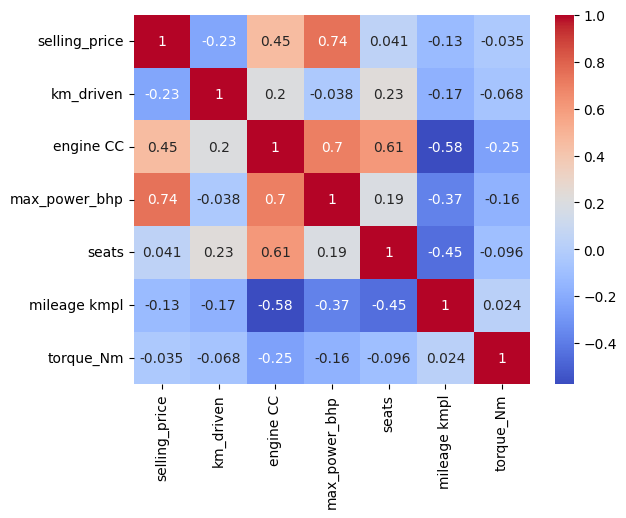

In [ ]:
# plotting the heatmap for df2
sns.heatmap(df3.corr(), annot=True, cmap = 'coolwarm')

<Axes: xlabel='name', ylabel='count'>

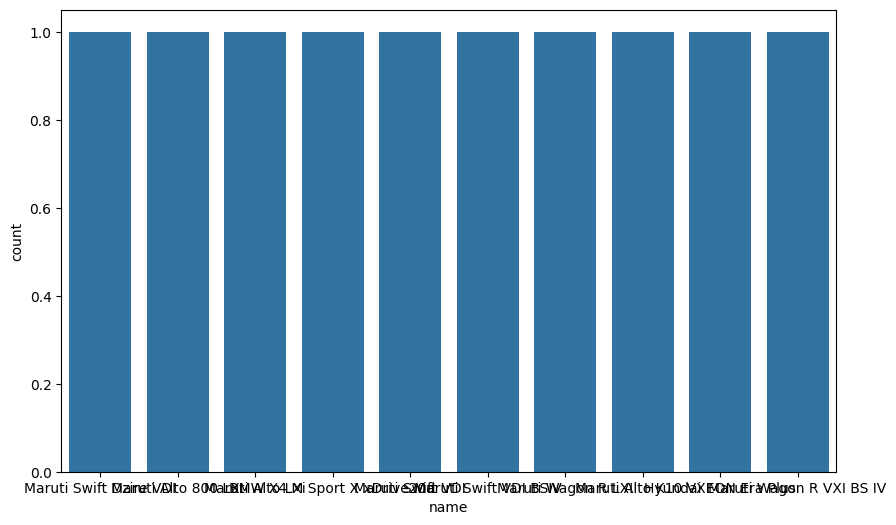

In [ ]:
#plot count plot for top 10 in name column
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(df['name'].value_counts()[:10])


<Axes: xlabel='fuel', ylabel='count'>

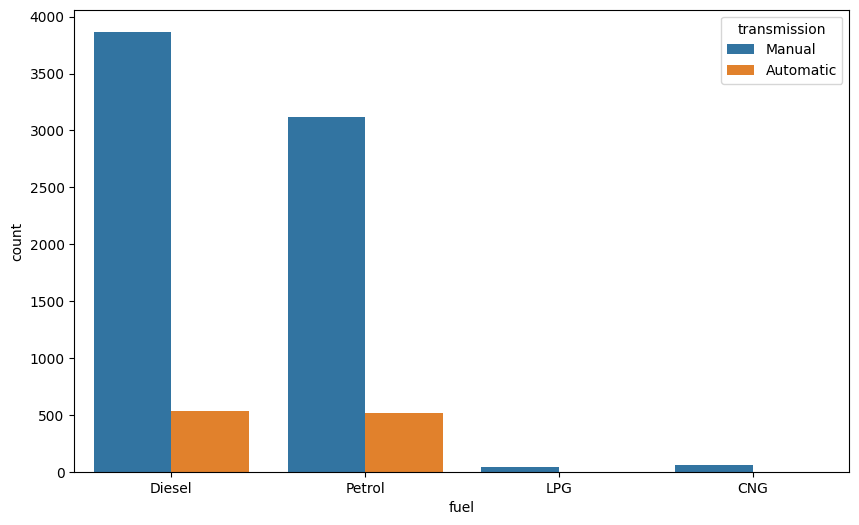

In [ ]:
# count plot for fuel
fig = plt.figure(figsize = (10,6))
sns.countplot(x = 'fuel',data = df, hue = 'transmission')

<Axes: xlabel='fuel,transmission'>

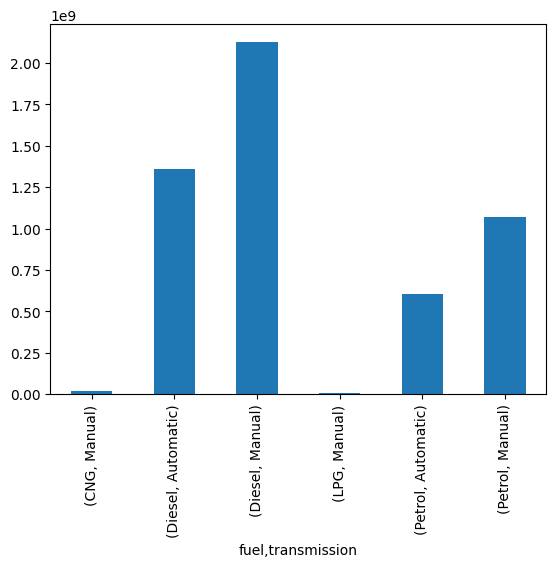

In [ ]:
#plot for selling price sum with fuel and transmission
df.groupby(['fuel','transmission'])['selling_price'].sum().plot(kind = 'bar')

<Axes: xlabel='fuel,transmission,seller_type'>

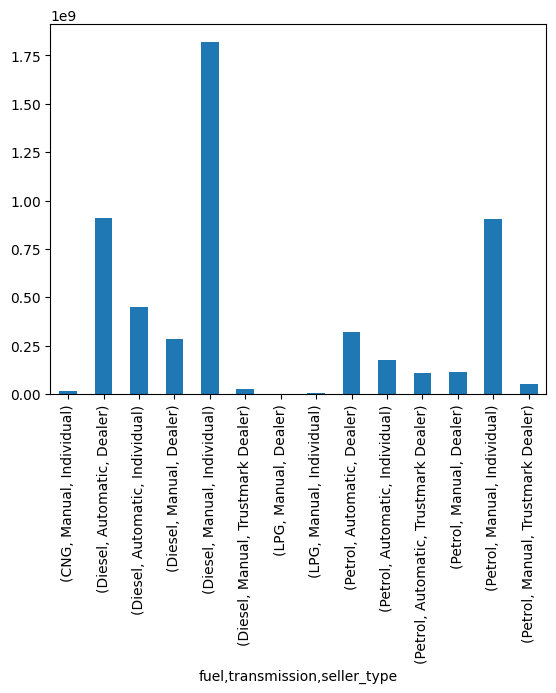

In [ ]:
df.groupby(['fuel','transmission','seller_type'])['selling_price'].sum().plot(kind = 'bar')

In [ ]:
df3.head()

,selling_price,km_driven,engine CC,max_power_bhp,seats,mileage kmpl,torque_Nm
0,450000,145500,1248.0,74.00,5.0,23.40,190.000
1,370000,120000,1498.0,103.52,5.0,21.14,250.000
2,158000,140000,1497.0,78.00,5.0,17.70,124.587
3,225000,127000,1396.0,90.00,5.0,23.00,219.744
4,130000,120000,1298.0,88.20,5.0,16.10,112.815


In [ ]:
y = df3['selling_price']
x = df3.drop('selling_price', axis = 1)

In [ ]:
y.head()

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000


In [ ]:
x.head()

,km_driven,engine CC,max_power_bhp,seats,mileage kmpl,torque_Nm
0,145500,1248.0,74.00,5.0,23.40,190.000
1,120000,1498.0,103.52,5.0,21.14,250.000
2,140000,1497.0,78.00,5.0,17.70,124.587
3,127000,1396.0,90.00,5.0,23.00,219.744
4,120000,1298.0,88.20,5.0,16.10,112.815


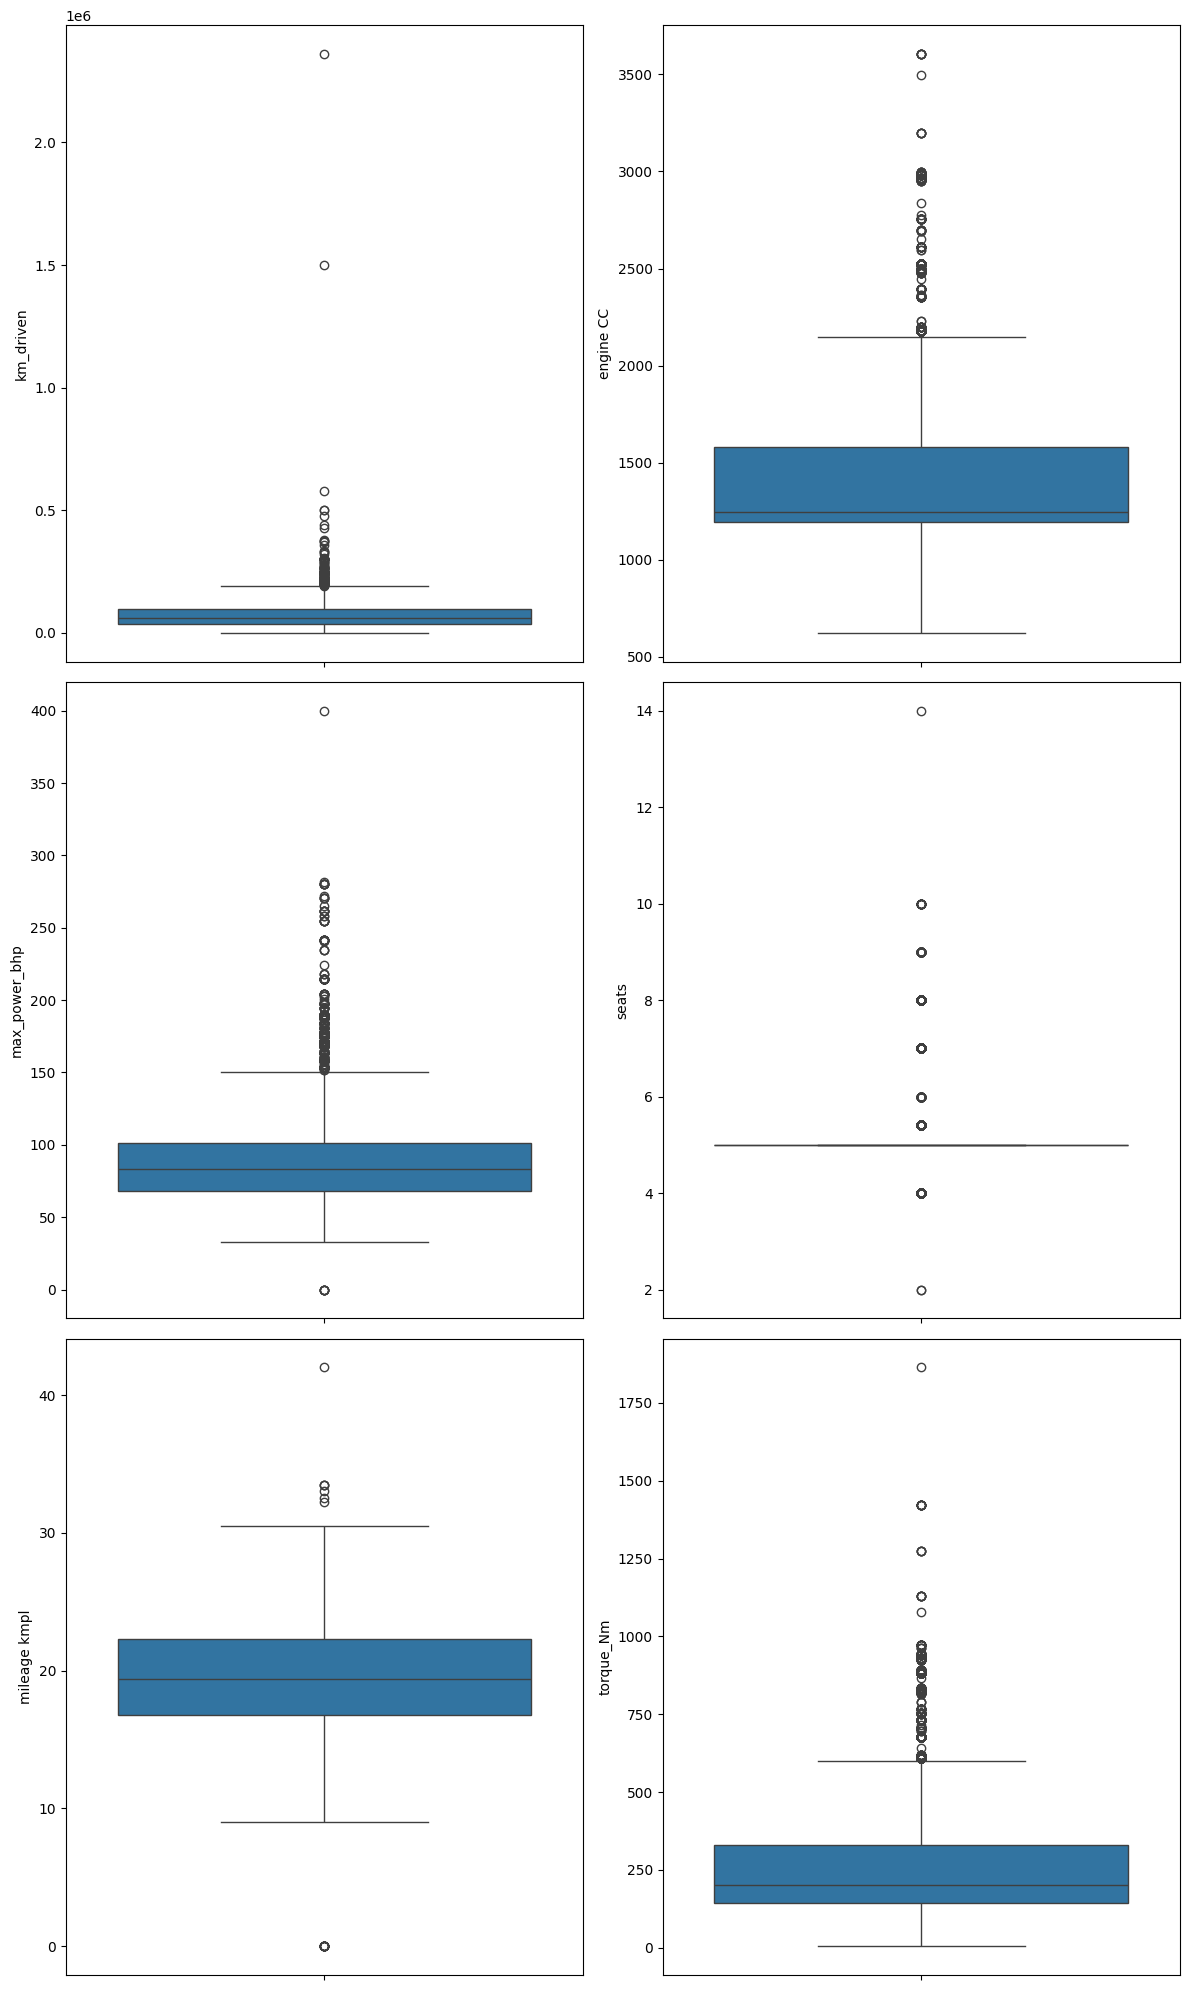

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(12, 20))
plt1 = sns.boxplot(df3['km_driven'], ax = axs[0,0])
plt2 = sns.boxplot(df3['engine CC'], ax = axs[0,1])
plt3 = sns.boxplot(df3['max_power_bhp'], ax = axs[1,0])
plt4 = sns.boxplot(df3['seats'], ax = axs[1,1])
plt5 = sns.boxplot(df3['mileage kmpl'], ax = axs[2,0])
plt6 = sns.boxplot(df3['torque_Nm'], ax = axs[2,1])
plt.tight_layout()
plt.show()

<Axes: xlabel='year', ylabel='selling_price'>

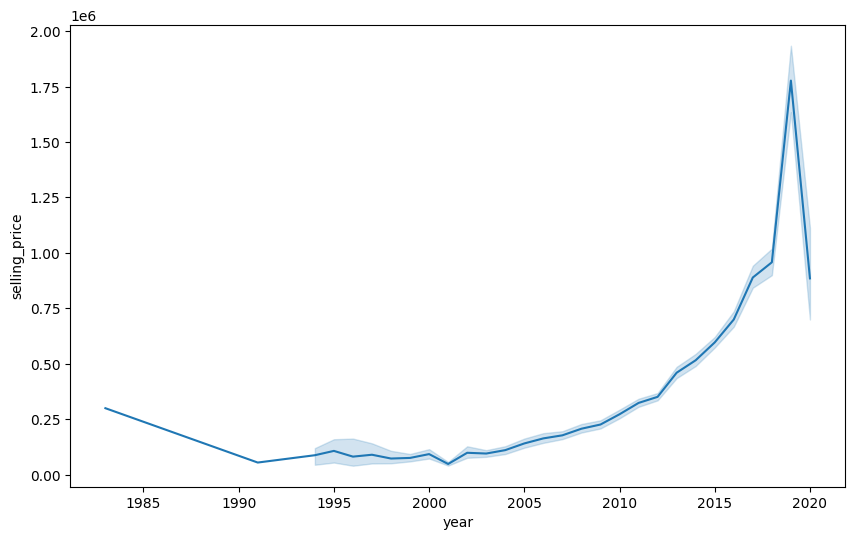

In [ ]:
# plot the diagram for year and selling price in df
fig = plt.figure(figsize = (10,6))
sns.lineplot(x = 'year', y = 'selling_price', data = df)

<Axes: xlabel='max_power_bhp', ylabel='Density'>

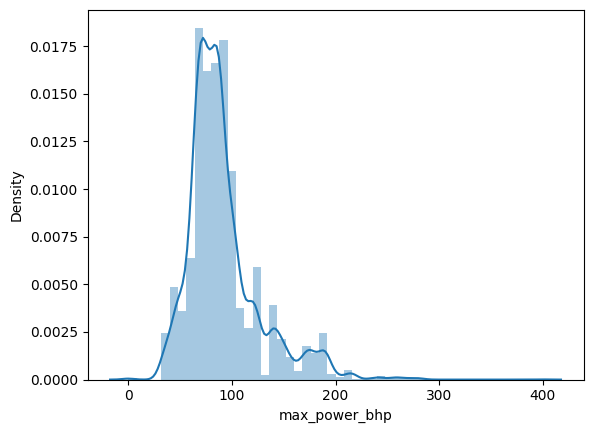

In [ ]:
sns.distplot(df3['max_power_bhp'])

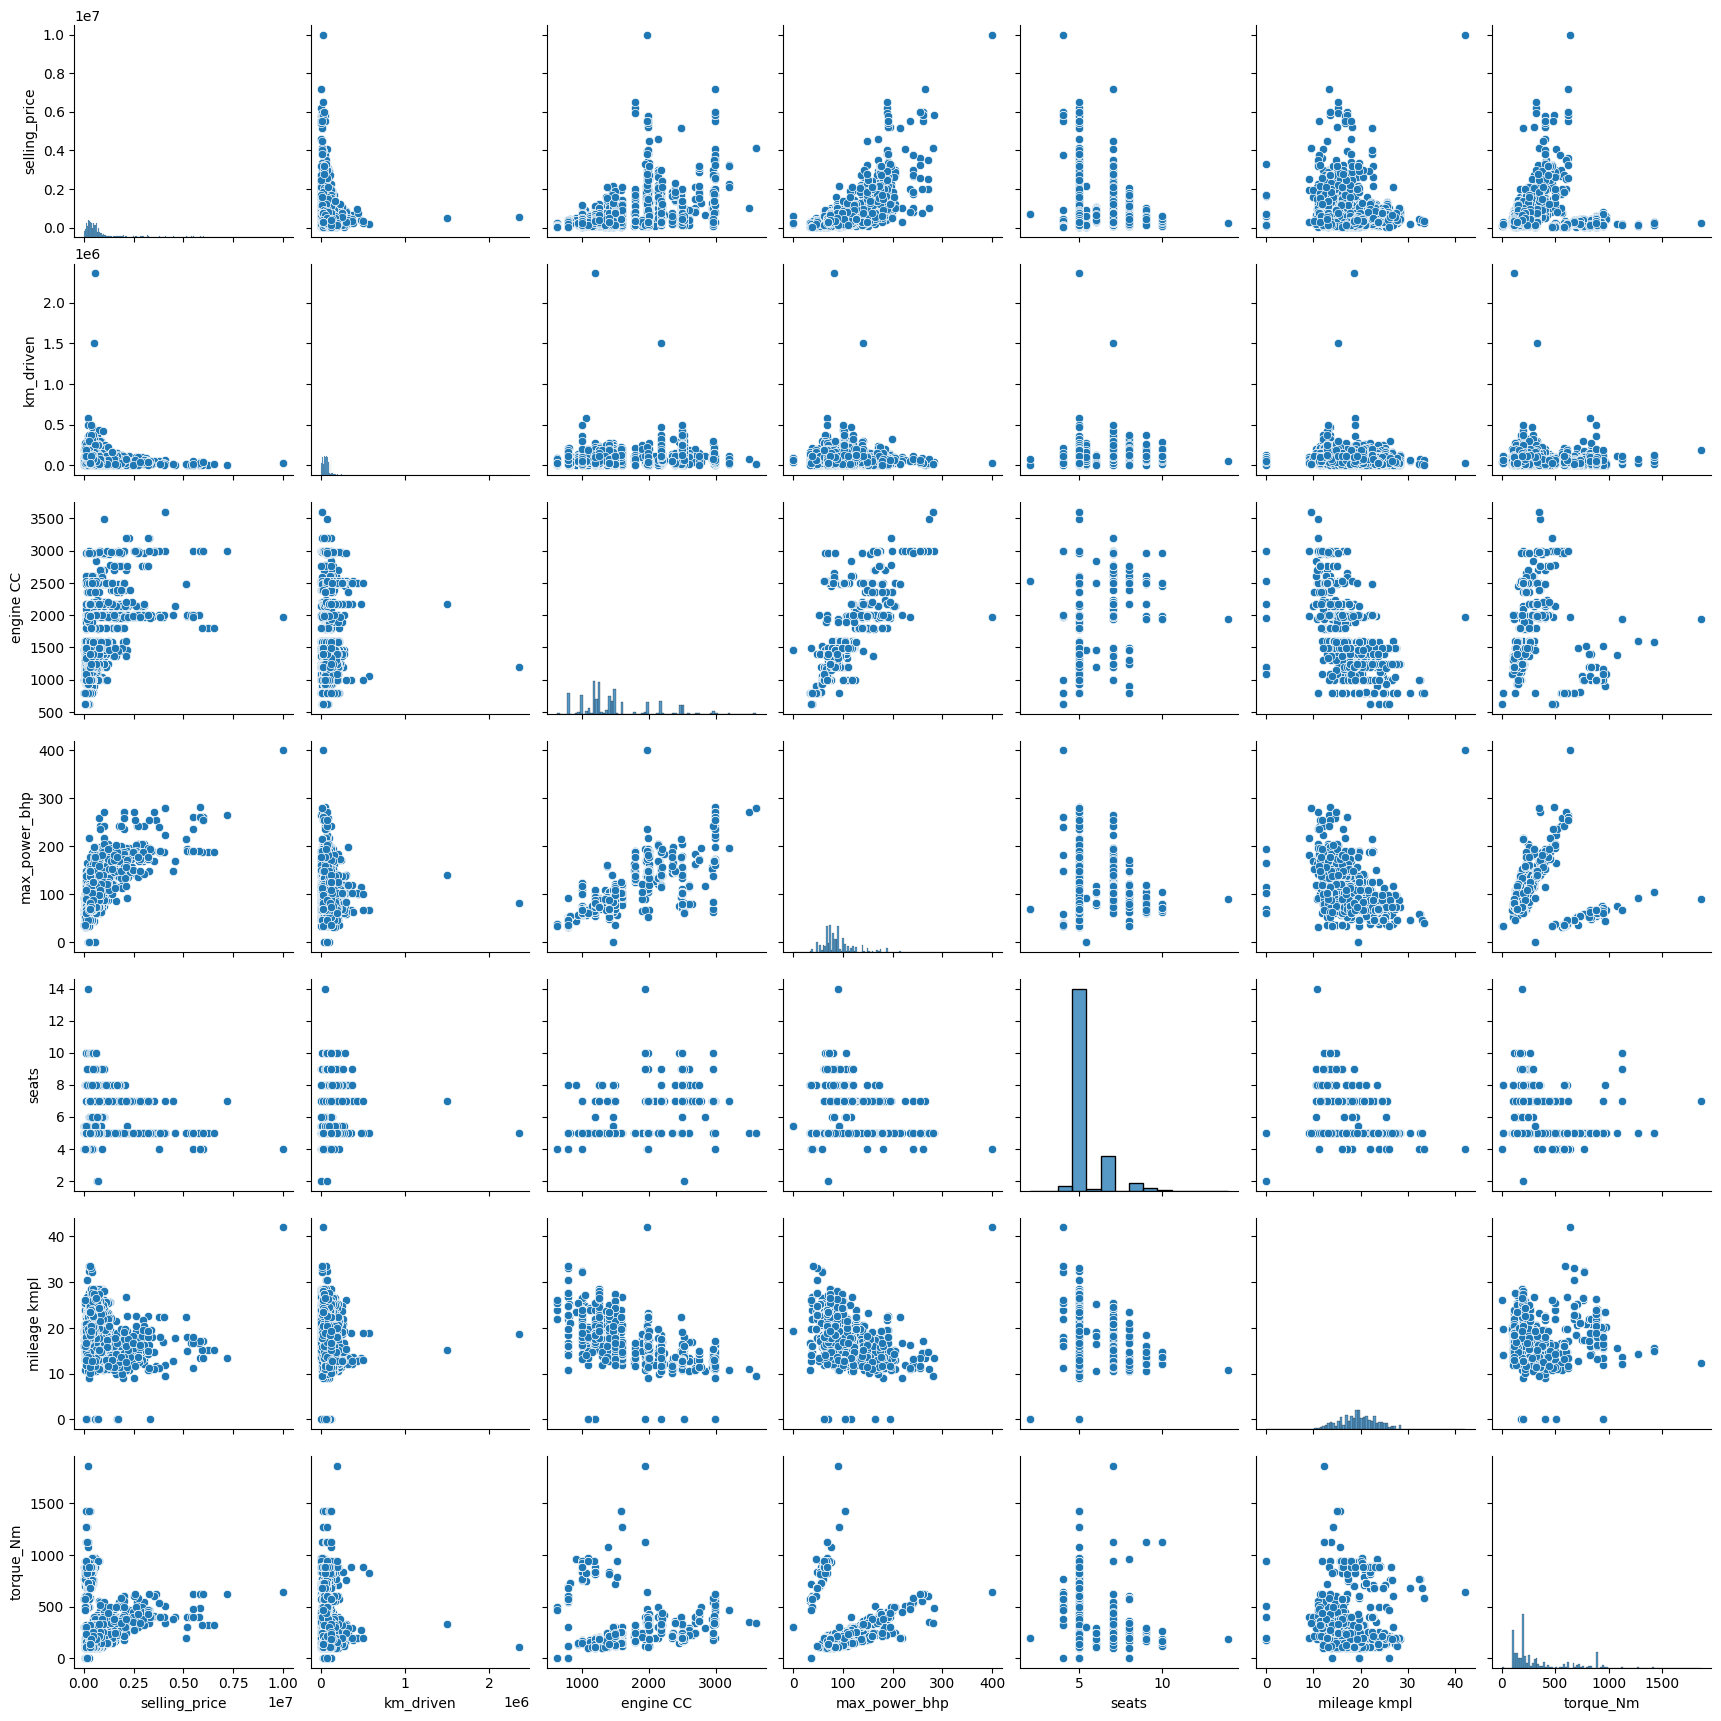

In [ ]:
sns.pairplot(df3)

In [ ]:
# linear regression model building
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape

(6502, 6)

In [ ]:
y_train.shape

(6502,)

In [ ]:
X_test.shape


(1626, 6)

In [ ]:
y_test.shape

(1626,)

In [ ]:
reg_model = linear_model.LinearRegression()
reg_model.fit(X_train,y_train)
y_pred = reg_model.predict(X_test)

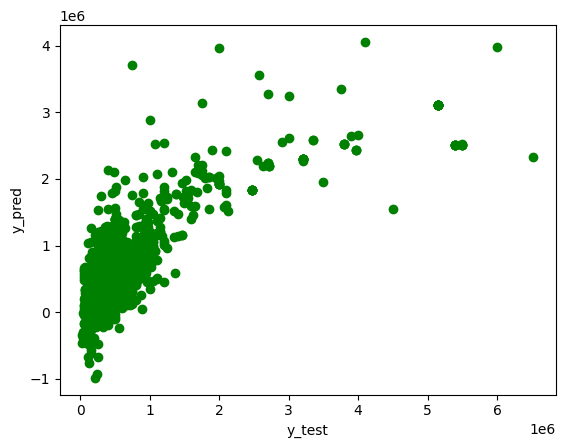

In [ ]:
plt.scatter(y_test,y_pred, c = 'green')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
#get the metrics r2_score, mse, mae
print("R2 score: ", r2_score(y_test,y_pred))
print("Mean squared error: ", mean_squared_error(y_test,y_pred))
print("Mean absolute error: ", mean_absolute_error(y_test,y_pred))

R2 score:  0.6356529737205386
Mean squared error:  238823806633.89838
Mean absolute error:  286422.9859933807


In [ ]:
coefficients = pd.DataFrame(reg_model.coef_, x.columns, columns=['Coefficient'])
coefficients

,Coefficient
km_driven,-2.294096
engine CC,174.508518
max_power_bhp,17045.838495
seats,-42983.306108
mileage kmpl,32489.948608
torque_Nm,322.361700


In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine CC,max_power_bhp,seats,mileage kmpl,torque_Nm,speed_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248.0,74.00,5.0,23.40,190.000,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.52,5.0,21.14,250.000,1500-2500
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497.0,78.00,5.0,17.70,124.587,"2,700"
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396.0,90.00,5.0,23.00,219.744,1750-2750
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298.0,88.20,5.0,16.10,112.815,"4,500"


In [ ]:
df.drop('name', axis =1,inplace = True)

In [ ]:
df.drop('year', axis =1, inplace = True)

In [ ]:
df.drop('speed_rpm', axis = 1, inplace = True)

In [ ]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,engine CC,max_power_bhp,seats,mileage kmpl,torque_Nm
0,450000,145500,Diesel,Individual,Manual,First Owner,1248.0,74.00,5.0,23.40,190.000
1,370000,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.52,5.0,21.14,250.000
2,158000,140000,Petrol,Individual,Manual,Third Owner,1497.0,78.00,5.0,17.70,124.587
3,225000,127000,Diesel,Individual,Manual,First Owner,1396.0,90.00,5.0,23.00,219.744
4,130000,120000,Petrol,Individual,Manual,First Owner,1298.0,88.20,5.0,16.10,112.815


In [ ]:
df = pd.get_dummies(df, columns = ['fuel','seller_type','transmission','owner'],drop_first = True)

In [ ]:
df.head()

,selling_price,km_driven,engine CC,max_power_bhp,seats,mileage kmpl,torque_Nm,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000,145500,1248.0,74.00,5.0,23.40,190.000,True,False,False,True,False,True,False,False,False,False
1,370000,120000,1498.0,103.52,5.0,21.14,250.000,True,False,False,True,False,True,False,True,False,False
2,158000,140000,1497.0,78.00,5.0,17.70,124.587,False,False,True,True,False,True,False,False,False,True
3,225000,127000,1396.0,90.00,5.0,23.00,219.744,True,False,False,True,False,True,False,False,False,False
4,130000,120000,1298.0,88.20,5.0,16.10,112.815,False,False,True,True,False,True,False,False,False,False


In [ ]:
df.columns

Index(['selling_price', 'km_driven', 'engine CC', 'max_power_bhp', 'seats',
       'mileage kmpl', 'torque_Nm', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [ ]:
'''map the False to 0 and True to 1 in the columns 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'
'''

df['fuel_Diesel'] = df['fuel_Diesel'].map({False: 0, True: 1})
df['fuel_LPG'] = df['fuel_LPG'].map({False: 0, True: 1})
df['fuel_Petrol'] = df['fuel_Petrol'].map({False: 0, True: 1})

df['seller_type_Individual'] = df['seller_type_Individual'].map({False: 0, True: 1})
df['seller_type_Trustmark Dealer'] = df['seller_type_Trustmark Dealer'].map({False: 0, True: 1})

df['transmission_Manual'] = df['transmission_Manual'].map({False: 0, True: 1})

df['owner_Fourth & Above Owner'] = df['owner_Fourth & Above Owner'].map({False: 0, True: 1})
df['owner_Second Owner'] = df['owner_Second Owner'].map({False: 0, True: 1})
df['owner_Test Drive Car'] = df['owner_Test Drive Car'].map({False: 0, True: 1})
df['owner_Third Owner'] = df['owner_Third Owner'].map({False: 0, True: 1})

In [ ]:
df.head()


,selling_price,km_driven,engine CC,max_power_bhp,seats,mileage kmpl,torque_Nm,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000,145500,1248.0,74.00,5.0,23.40,190.000,1,0,0,1,0,1,0,0,0,0
1,370000,120000,1498.0,103.52,5.0,21.14,250.000,1,0,0,1,0,1,0,1,0,0
2,158000,140000,1497.0,78.00,5.0,17.70,124.587,0,0,1,1,0,1,0,0,0,1
3,225000,127000,1396.0,90.00,5.0,23.00,219.744,1,0,0,1,0,1,0,0,0,0
4,130000,120000,1298.0,88.20,5.0,16.10,112.815,0,0,1,1,0,1,0,0,0,0


In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [ ]:
df_train_scaled = scaler.fit_transform(df_train)
df_test_scaled = scaler.transform(df_test)

In [ ]:
df_train_scaled = pd.DataFrame(df_train_scaled, columns=df_train.columns)
df_test_scaled = pd.DataFrame(df_test_scaled, columns=df_test.columns)

In [ ]:
df_train_scaled.head()

,selling_price,km_driven,engine CC,max_power_bhp,seats,mileage kmpl,torque_Nm,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0.049148,0.001084,0.192953,0.209525,0.25,0.571429,0.058738,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.027081,0.033891,0.192617,0.217000,0.25,0.461905,0.056049,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.035105,0.063547,0.259060,0.225000,0.25,0.547619,0.115617,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.050151,0.050837,0.209396,0.185000,0.25,0.557143,0.099618,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.030592,0.010591,0.125503,0.167625,0.25,0.570238,0.472325,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


<Axes: >

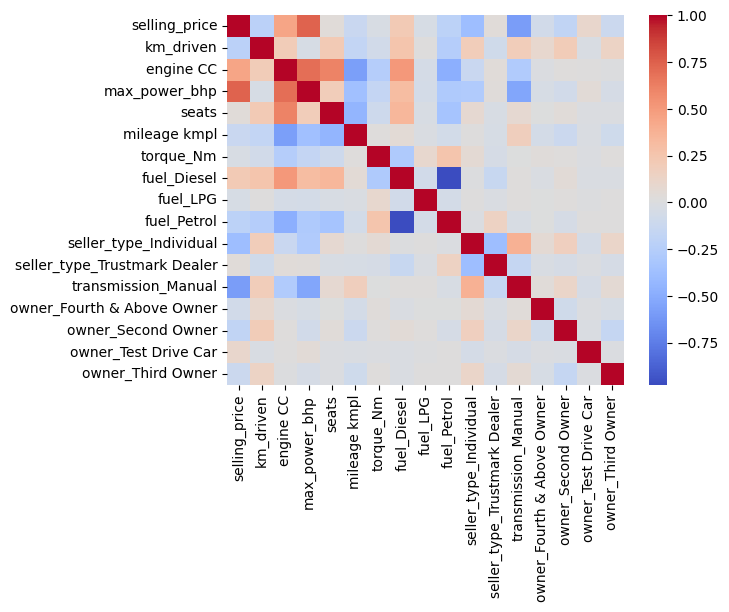

In [ ]:
sns.heatmap(df_train_scaled.corr(), annot=False, cmap='coolwarm')

In [ ]:
!pip install statsmodels

In [ ]:
import statsmodels.api as sm
y_train = df_train_scaled['selling_price']
x_train = df_train_scaled.drop('selling_price', axis=1)
x_train_lm = sm.add_constant(x_train[['km_driven']])

In [ ]:
lr = sm.OLS(y_train, x_train_lm).fit()

In [ ]:
lr.params

,0
const,0.082016
km_driven,-0.706521


In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     318.8
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           1.19e-69
Time:                        05:20:23   Log-Likelihood:                 7289.2
No. Observations:                6502   AIC:                        -1.457e+04
Df Residuals:                    6500   BIC:                        -1.456e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0820      0.002     53.663      0.000       0.079       0.085
km_driven     -0.7065      0.040    -17.855      0.000      -0.784      -0.629
==============================================================================
Omnibus:                     5615.268   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           146234.398
Skew:                           4.192   Prob(JB):                         0.00
Kurtosis:                      24.668   Cond. No.                         40.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_train_lm = sm.add_constant(x_train[['km_driven','mileage kmpl']])
lr = sm.OLS(y_train, x_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     261.2
Date:                Sat, 07 Jun 2025   Prob (F-statistic):          7.49e-110
Time:                        05:20:42   Log-Likelihood:                 7384.9
No. Observations:                6502   AIC:                        -1.476e+04
Df Residuals:                    6499   BIC:                        -1.474e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1514      0.005     29.103      0.000       0.141       0.162
km_driven       -0.8001      0.040    -20.220      0.000      -0.878      -0.723
mileage kmpl    -0.1442      0.010    -13.936      0.000      -0.164      -0.124
==============================================================================
Omnibus:                     5654.447   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           163579.240
Skew:                           4.189   Prob(JB):                         0.00
Kurtosis:                      26.100   Cond. No.                         45.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""